# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [53]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [54]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


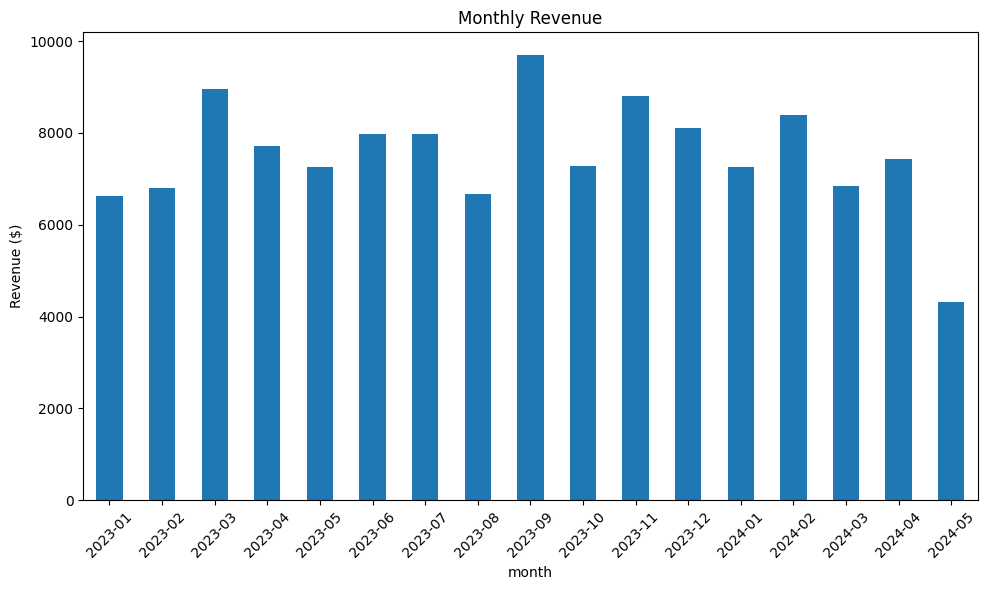

In [55]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [56]:
# Your code here
quarter_one = data[(data["order_date"] >= "2024-01-01") & (data["order_date"] <= "2024-03-31")]
total_revenue = quarter_one["revenue"].sum()

quarter_one["month"] = quarter_one["order_date"].dt.to_period("M")
quarter_one_monthly = quarter_one.groupby("month")["revenue"].sum()
print(total_revenue)
print(quarter_one_monthly)



22493.23
month
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
Freq: M, Name: revenue, dtype: float64


/tmp/ipykernel_32250/1269966140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_one["month"] = quarter_one["order_date"].dt.to_period("M")


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [57]:
# Your code here
top_customers = data.groupby("customer_id")["revenue"].sum().sort_values(ascending=False)
print(top_customers.head(5))

customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [58]:
# Your code here
customer_category = data.groupby("customer_segment")["revenue"].sum()
orders_per_cat = data.groupby("customer_segment")["order_id"].count()
avg_spending_per = (customer_category / orders_per_cat).sort_values(ascending=False)
print(avg_spending_per.round(2))
print("The senior segment has the highest average per order")

customer_segment
Senior          262.13
Professional    255.65
Student         253.81
dtype: float64
The senior segment has the highest average per order


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [59]:
# Your code here
region_rev = data.groupby("region")["revenue"].sum().sort_values(ascending=False)
print(region_rev)

order_per_region = data.groupby("region")["order_id"].count()
avg_earnings_per_region = (region_rev / order_per_region).sort_values(ascending=False)
print(avg_earnings_per_region.round(2))

print("South has the highest revenue, South also has the highest average order")

region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64
region
South    274.33
North    258.28
West     252.07
East     240.17
dtype: float64
South has the highest revenue, South also has the highest average order


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [60]:
# Your code here
top_rev = data.groupby("product_category")["revenue"].sum().sort_values(ascending=False)
print(top_rev.head(5))

top_quan = data.groupby("product_category")["quantity"].sum().sort_values(ascending=False)
print(top_quan.head(5))

print("Home,electronics and clothing seem to be most popular")

product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64
product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64
Home,electronics and clothing seem to be most popular


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [61]:
# Your code here
avg_rev_discounted = data.groupby("discount_applied")["revenue"].mean().sort_values(ascending=False)
print(avg_rev_discounted)
print("discounts at 25,15,5 and 10 generate higher revenue")

discount_applied
25    301.361000
15    283.809796
5     266.914237
10    264.531364
0     248.296337
30    245.007727
20    215.790000
Name: revenue, dtype: float64
discounts at 25,15,5 and 10 generate higher revenue


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [62]:
# Your code here
payment_method_spread = data.groupby("payment_method")["order_id"].count()
avg_payment_method_spread  = ((payment_method_spread  / 500) * 100).sort_values(ascending=False)
print(avg_payment_method_spread)
print("Higher % of transactions with credit cards")

payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: order_id, dtype: float64
Higher % of transactions with credit cards


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

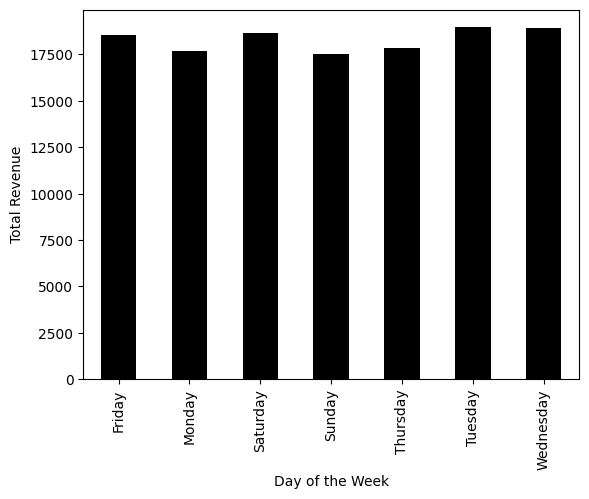

Mainly inconclusive, Friday and Saturday as well as Tuesday and Wednesday are peak


In [63]:
# Your code here
rev_by_day_of_week = (data.groupby("day_of_week")["revenue"].sum())

rev_by_day_of_week.plot(kind="bar",color = "black")
plt.ylabel("Total Revenue")
plt.xlabel("Day of the Week")
plt.show()

print("Mainly inconclusive, Friday and Saturday as well as Tuesday and Wednesday are peak")

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [64]:
# Your code here
data["profit"] = data["revenue"] * 0.20
total_profit = data["profit"].sum()

print("Estimated total profit: ",total_profit.round(2))

profit_for_each_region = (data.groupby("region")["profit"].sum().sort_values(ascending=False))
print(profit_for_each_region.round(2))
print("The most profitable region is the south")

Estimated total profit:  25628.13
region
South    6967.89
North    6870.34
East     6244.36
West     5545.55
Name: profit, dtype: float64
The most profitable region is the south


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

Based on the data and our insights I would recommend not exceeding a discount value over 25. The items with a discount of 25% seemed to bring the most revenue and the South appears to be the most
profitable region. Other insights include that home products were top of the category sales, along with clothing and electronics. The products should try and target seniors since they were the most profitable
shoppers. Maybe include certain deals that credit card users are allowed to access on the weekends? It could result in an increase of shoppers since weekends peak sales

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.